In [178]:
import pandas as pd 
data = pd.read_csv('Global-Superstore.csv')

In [179]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2/5/2013,2/7/2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,11/5/2013,11/6/2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [181]:
data.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

We will drop Postal Code column because it contains too many missing values 

In [182]:
data = data.drop('Postal Code',1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_23632\806019450.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop('Postal Code',1)


Drop any columns contain only one unique value and remove them 

In [183]:
orig_columns = data.columns
drop_columns = []
for col in orig_columns:
    col_series = data[col].dropna().unique()
    if len(col_series) == 1: ##Use the len() function to return the number of values in that set##
        drop_columns.append(col)
data = data.drop(drop_columns, axis=1)
print(drop_columns)

[]


Convert Order date and Ship date to datetime type 

In [184]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [185]:
data['Month_Order'] = data['Order Date'].dt.month

In [186]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month_Order
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,7
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,10
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium,1
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical,11


DATA ANALYSIS / DATA VISUALIZATION

In [187]:
data['Quantity'].describe(include = True)

count    51290.000000
mean         3.476545
std          2.278766
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         14.000000
Name: Quantity, dtype: float64

<AxesSubplot:ylabel='Frequency'>

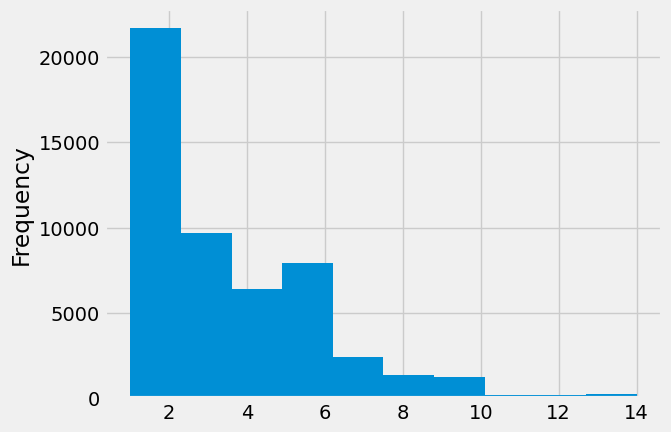

In [188]:
data['Quantity'].plot.hist(range =(1,14),bins = 10)

From histogram above, we can indicate that people tend to buy from 1 to more than 2 stuffs per their purchase 

Checking for outliers in our Sale data 

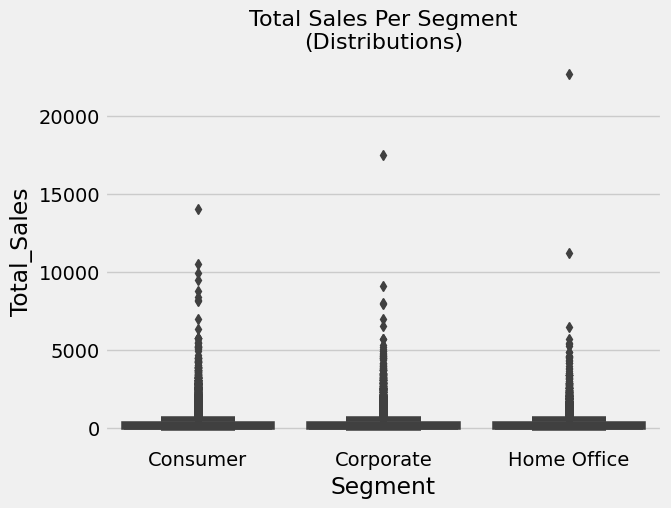

In [189]:
# Box plots to visualize distributions
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(y = 'Sales', x = 'Segment',
            data = data)
plt.title('Total Sales Per Segment\n(Distributions)',
         fontsize = 16)
plt.ylabel('Total_Sales')
plt.xlabel('Segment')
plt.show()

We will drop the row that contains segment which has sales above 12000

In [190]:
data_outliers = data[(data['Sales'] > 12000)]
data_outliers

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month_Order
329,38123,CA-2013-118689,2013-10-03,2013-10-10,Standard Class,TC-20980,Tamara Chand,Corporate,Lafayette,Indiana,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.95,5,0.0,8399.9760,349.07000,Medium,10
12887,33994,CA-2011-145317,2011-03-18,2011-03-23,Standard Class,SM-20320,Sean Miller,Home Office,Jacksonville,Florida,...,Technology,Machines,Cisco TelePresence System EX90 Videoconferenci...,22638.48,6,0.5,-1811.0784,24.28650,Medium,3
14843,39450,CA-2014-140151,2014-03-24,2014-03-26,First Class,RB-19360,Raymond Buch,Consumer,Seattle,Washington,...,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,13999.96,4,0.0,6719.9808,20.00054,Medium,3


In [191]:
data = data.drop(data_outliers.index)

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

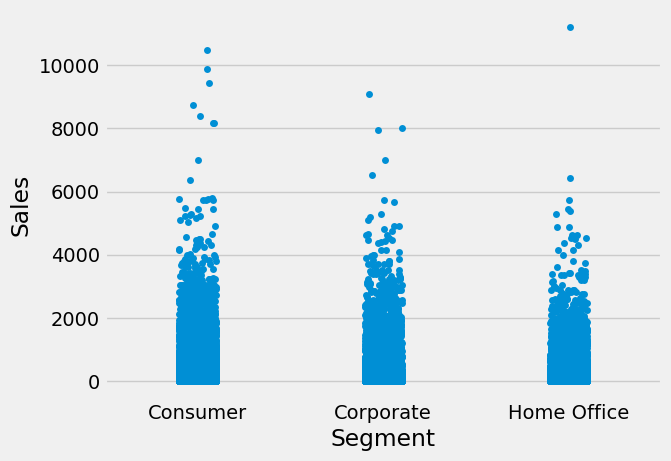

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')
sns.stripplot(x='Segment',y='Sales',data = data ,jitter= True )

In [193]:
import pandas as pd
by_segment = data.groupby('Segment').agg({"Sales" :['mean']})
by_segment.columns = ['Avg total sales']
by_segment =pd.DataFrame(by_segment)
by_segment.reset_index(inplace=True)

In [194]:
by_segment

,Segment,Avg total sales
0,Consumer,244.897592
1,Corporate,246.771945
2,Home Office,244.831566


Text(0.5, 0, 'Segments')

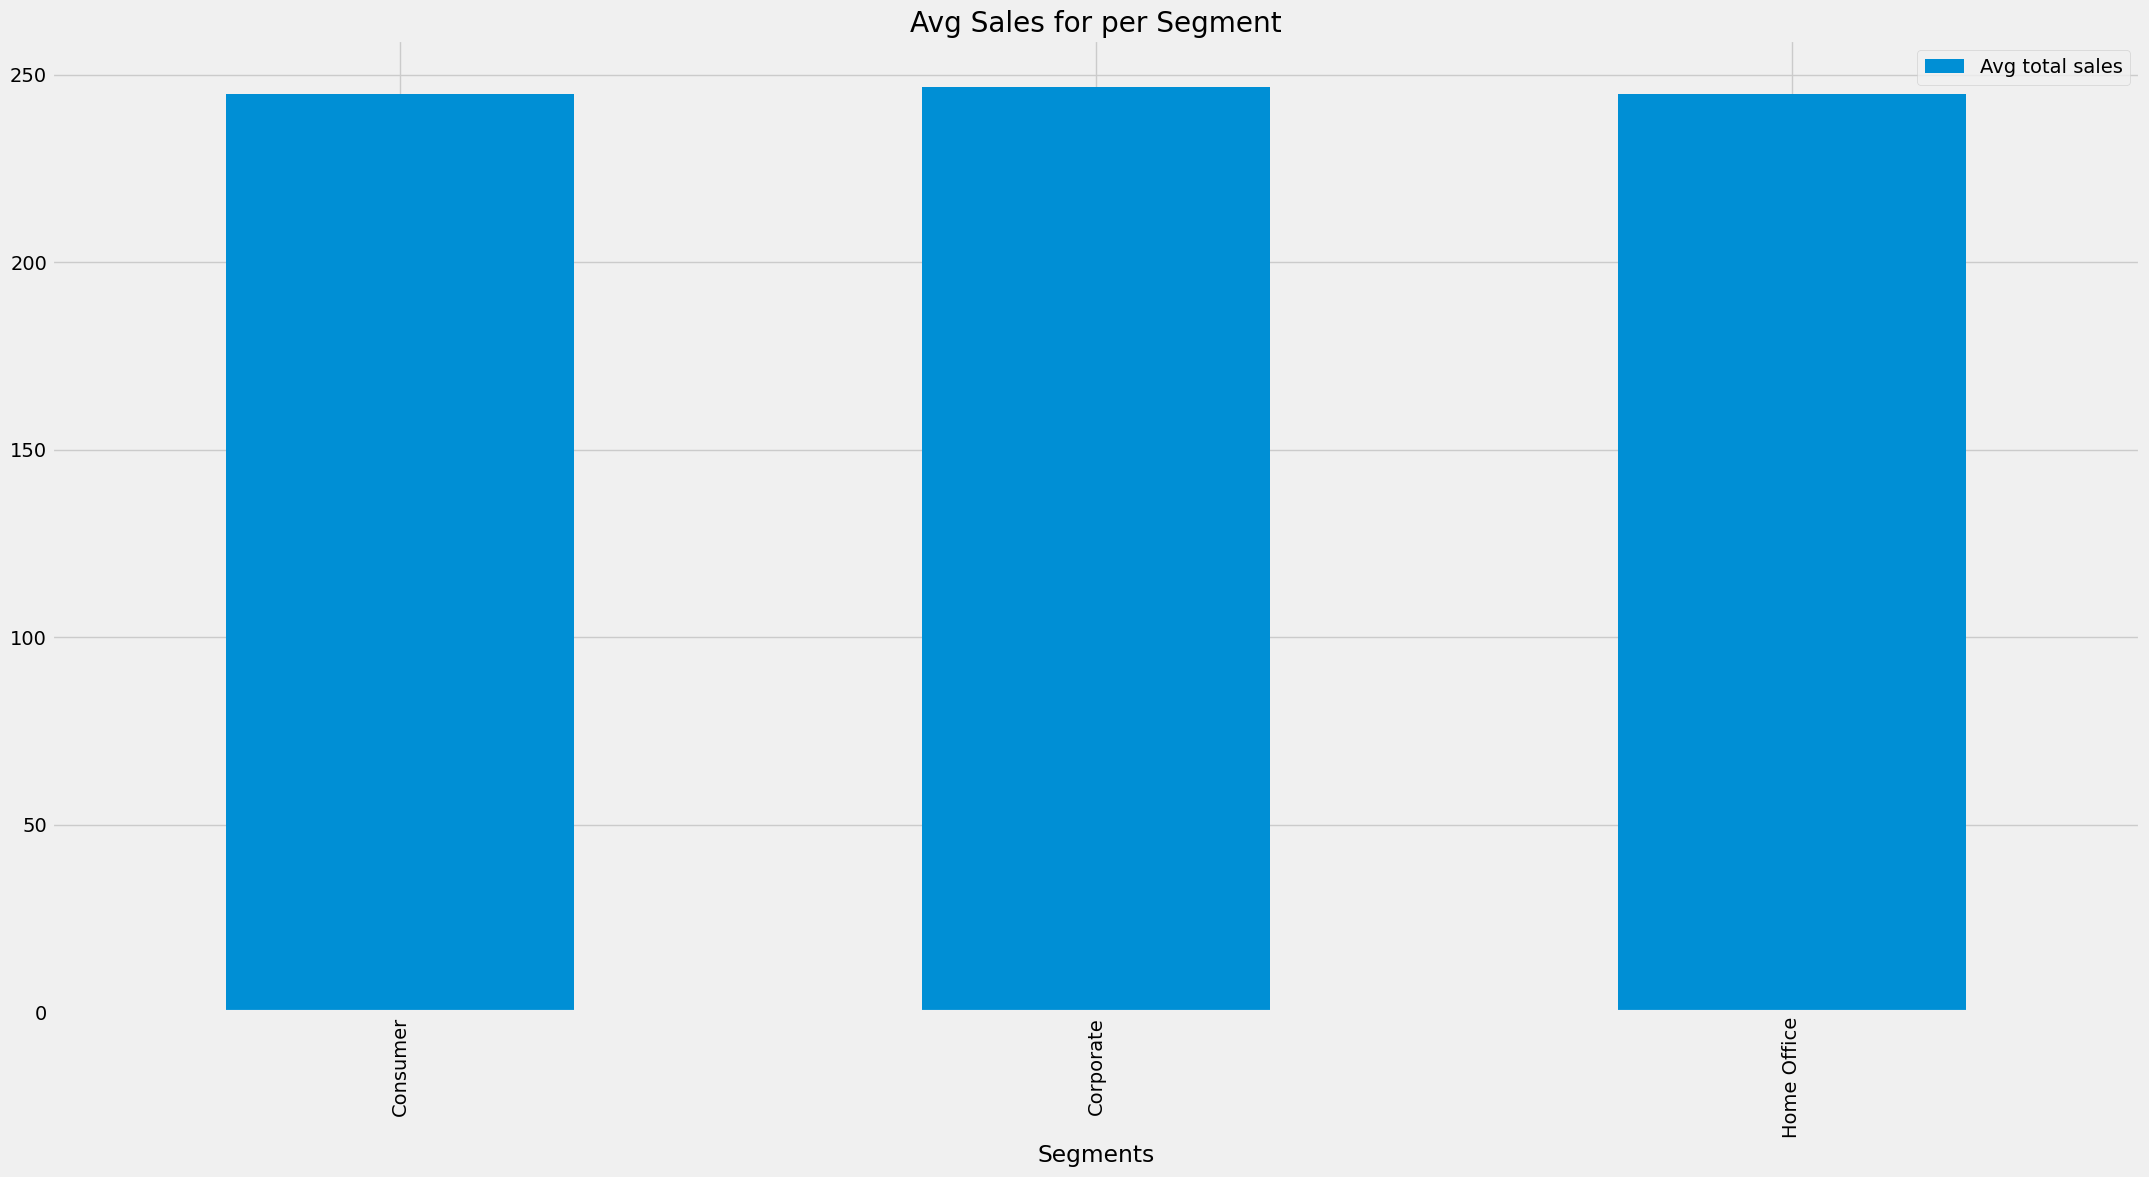

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ax1 = by_segment.plot(x='Segment',y='Avg total sales',kind='bar',figsize=(24,12))
ax1.set_title('Avg Sales for per Segment')
ax1.set_xlabel('Segments')

In [196]:
data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month_Order
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,7
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2


In [197]:
data['Category'].value_counts()

Office Supplies    31273
Technology         10138
Furniture           9876
Name: Category, dtype: int64

Text(0.5, 1.07, 'The frequency of Category for three segments ')

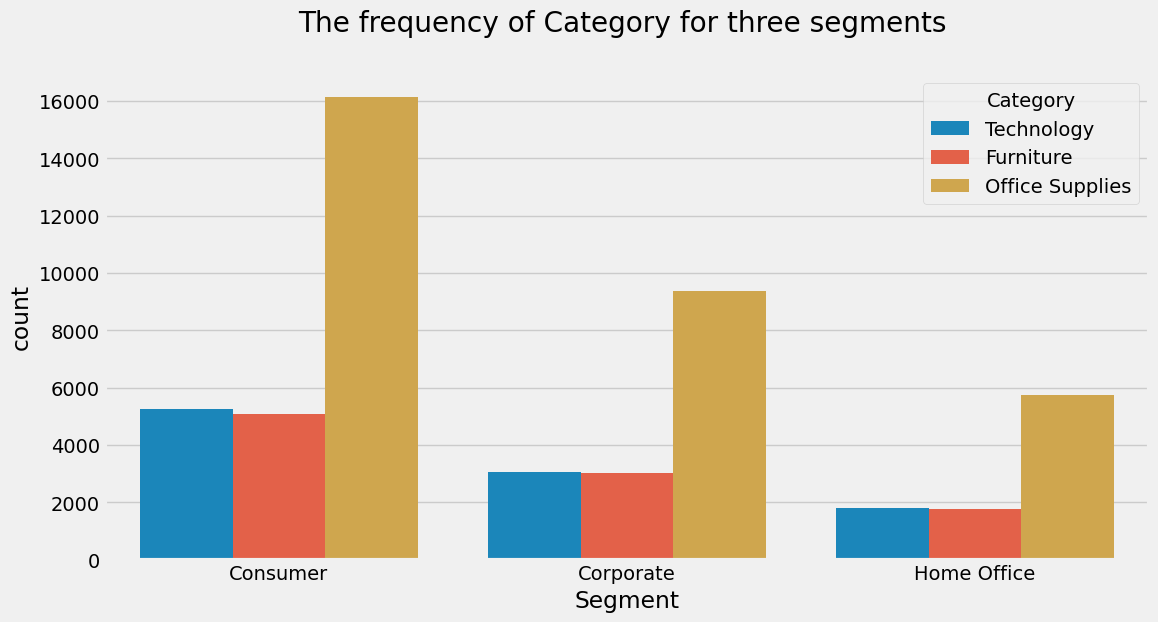

In [198]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12,6))
sns.countplot(x='Segment',hue='Category',data=data)
plt.title("The frequency of Category for three segments ",
          y = 1.07) # the `y` parameter pads the title upward

From frequency chart above, we witness that office supplies is  the most popular stuff among three segments

In [199]:
group_by_months = data.groupby('Month_Order').agg({"Sales":['sum']})
group_by_months.columns =["Sum sales"]
group_by_months = pd.DataFrame(group_by_months)
group_by_months.reset_index(inplace=True)

In [200]:
group_by_months

,Month_Order,Sum sales
0,1,6.751337e+05
1,2,5.437394e+05
2,3,7.338625e+05
3,4,6.985612e+05
4,5,9.040123e+05
5,6,1.269717e+06
6,7,7.493818e+05
7,8,1.293833e+06
8,9,1.437380e+06
9,10,1.150684e+06


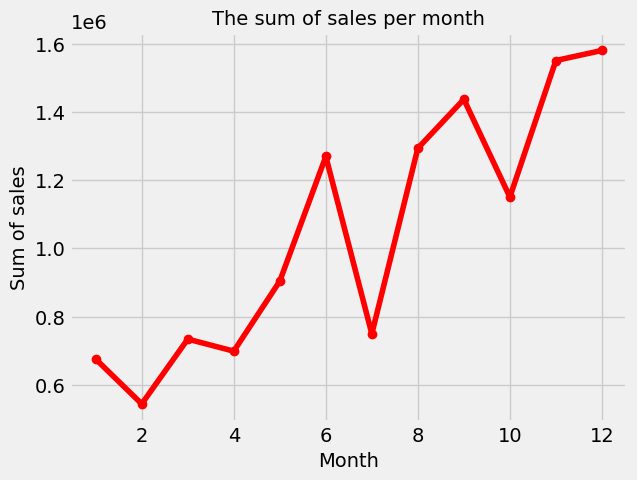

In [201]:
plt.plot(group_by_months['Month_Order'], group_by_months['Sum sales'], color='red', marker='o')
plt.title('The sum of sales per month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Sum of sales', fontsize=14)
plt.grid(True)
plt.show()

From line chart above, we can include that sales will increase during the period from November to December which is end of the year and during the period from May to June which is in summer 

In [210]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Month_Order
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical,7
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical,2
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium,10


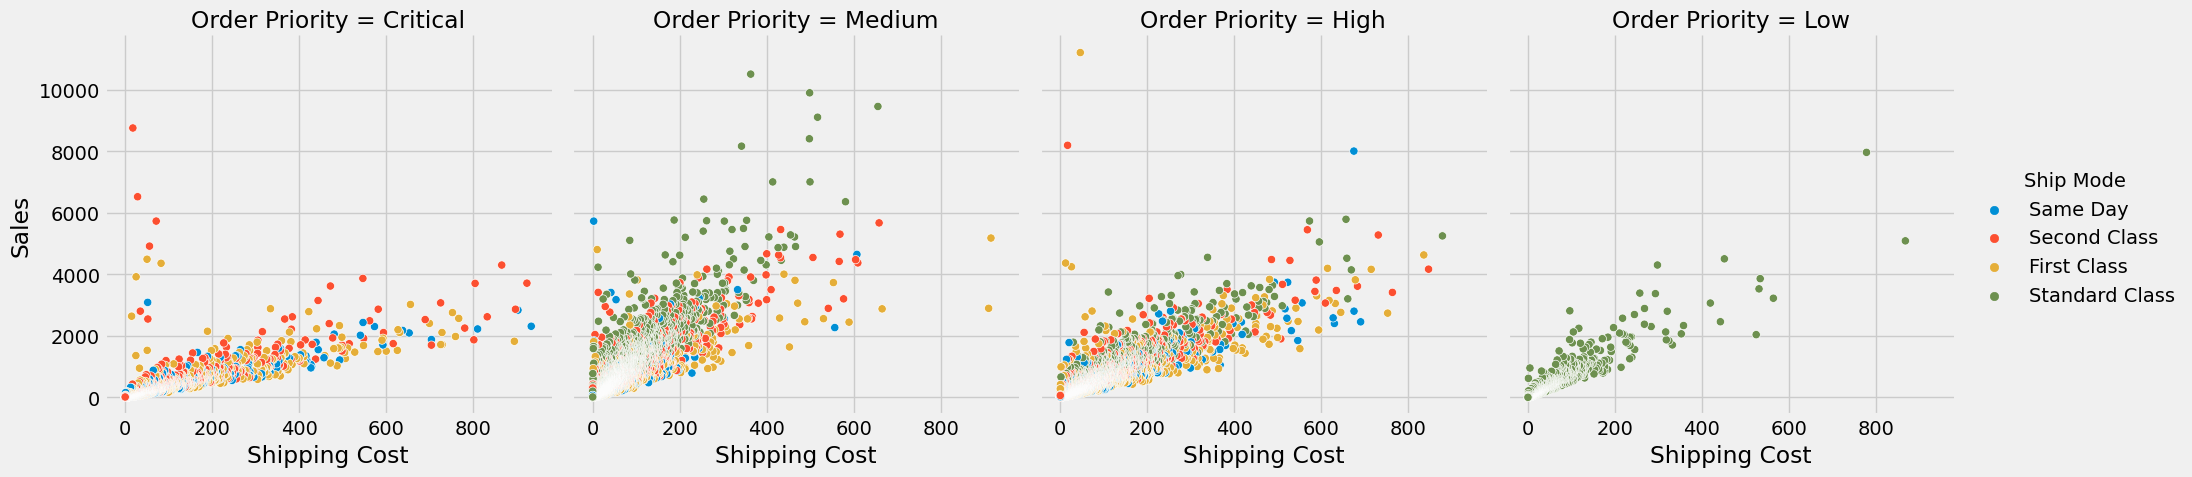

In [213]:
sns.relplot(data=data, x="Shipping Cost", y="Sales",hue="Ship Mode", col="Order Priority")